# RUN5: 2017-05-17 UT Preliminary Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from imaka.analysis import plot_stats
from astropy.table import Table
import numpy as np
from importlib import reload
from imaka.reduce.nights import reduce_2017_05_17 as redu

reload(redu)
reload(plot_stats)

root_dir = "/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170517/FLI/"


# Data Reduction

Fully reduce the data from 20170517 UT. Don't re-run this unless you really need to as it takes awhile. After you re-run the data reduction, please remember to load it back up to onaga.


In [ ]:
"""Set the appropriate root directory for your machine"""
redu.root_dir = '/Users/fatimaabdurrahman/Desktop/Research/RUN5/20170517/FLI/'

""""Make sky and flat images and use them to reduce science images"""
redu.make_sky()
redu.make_flat()
redu.reduce_FLD2()


""""Find stars in clean images and calculate stats"""
redu.find_stars_FLD2()
redu.calc_star_stats()

""""Make a stack of images for each mode and analyze stacks"""
redu.stack_FLD2()
redu.analyze_stacks()

# Load MASS/DIMM Data

Fetch the MASS/DIMM data and load it into the stats table. First, we will fetch the MASS/DIMM data from the MKWC. This only needs to be done once (ever).
Then, populate the stats table with matching MASS/DIMM data.


In [ ]:
from imaka.reduce import massdimm
import glob

massdimm_dir =root_dir + 'reduce/massdimm/'
massdimm.fetch_data('20170517', massdimm_dir)
stats_tables = glob.glob(root_dir + 'reduce/stats/stats*.fits')

for stats in stats_tables:
    if 'mdp.fits' not in stats:
        print('Adding MASS/DIMM to ' + stats)
        massdimm.append_mass_dimm(stats, mkwc_dir)
    else:
        print('Skipping ' + stats)

# Generate Plots

# FWHM and Seeing

Tonight's PSFs are significantly bigger than the seeing, noticably worse than in previous runs.  This may be due to warm air built up in the tube of the telescope causing local turbulence,which we will try to account for tomorrow night by letting wind flush out the telescope.

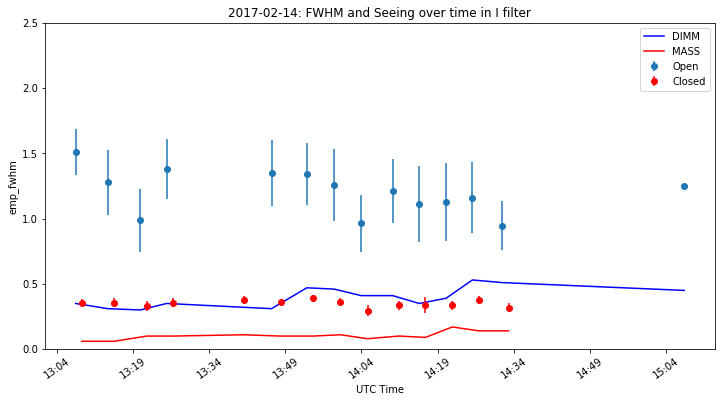

In [3]:
stats_dir = root_dir + "reduce/stats/"; plots_dir =root_dir + "reduce/plots/"
open_file = stats_dir +"stats_open_mdp.fits"; closed_file = stats_dir+ "stats_closed_mdp.fits"
closedA_file = stats_dir + 'stats_closedA_mdp.fits'; closedB_file = stats_dir + 'stats_closedB_mdp.fits'
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file, 'emp_fwhm', "2017-02-14: FWHM and Seeing over time in I filter", plots_dir)

# PSF Comparisons

Average values for empirical FWHM for the whole night:

Open Loop: 2.073

Closed Loop: 0.6    <-- Best

Closed A : 0.626

Closed B: 0.645

Though all PSF measurments tonight are consistently worse than the seeing, were seeing improvments of a factor of about 3.3 between open and closed loop, significantly greater than the improvment in previous runs.

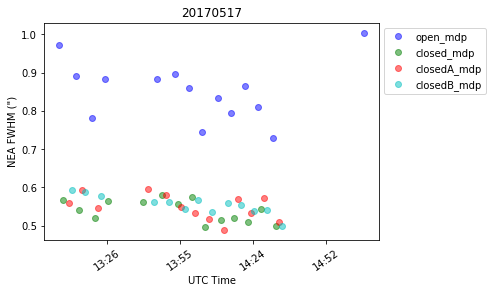

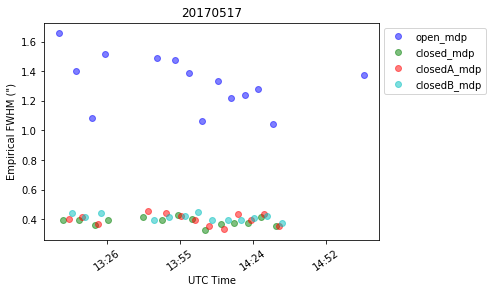

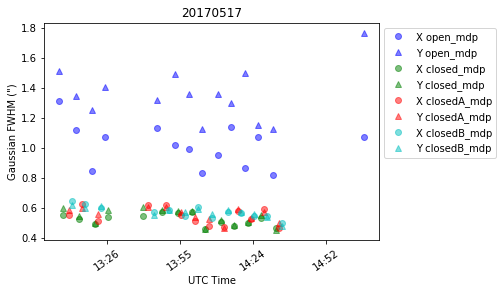

In [4]:
open_data = Table.read(open_file); closed_data = Table.read(closed_file)
closedA_data =Table.read(closedA_file); closedB_data = Table.read(closedB_file)
plot_stats.plot_best_stats('20170517', suffixes=['open_mdp', 'closed_mdp', 'closedA_mdp', 'closedB_mdp'], root_dir='/Users/fatimaabdurrahman/Desktop/Research/RUN5/')

# PSF Variability over Field of View

This preliminary analysis of PSF variability over the field of view shows no correlation between position on the field and either PSF size or elongation.  The plots below were generated from a stack of closed loop images, with each data point representing one star in the stacked image.

/Users/fatimaabdurrahman/Desktop/Research/imaka/imaka/analysis/plot_stats.py:1362: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(dist, x_fwhm/y_fwhm,'o', alpha=0.5);
/Users/fatimaabdurrahman/Desktop/Research/imaka/imaka/analysis/plot_stats.py:1374: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(x_cents, y_cents, c=x_fwhm/y_fwhm)


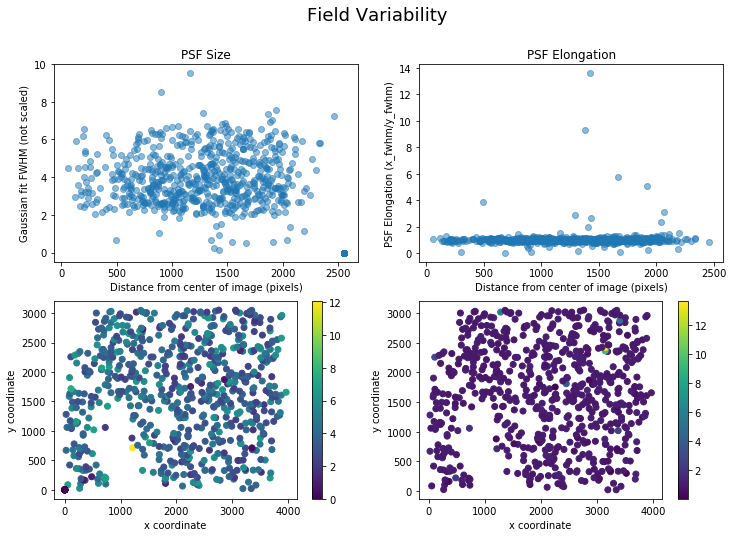

In [4]:
stack_dir = root_dir + "stacks/"
open_starlist = stack_dir+"FLD2_stack_open_stars.txt"; closed_starlist = stack_dir+"FLD2_stack_closed_stars.txt"
open_image = stack_dir + "FLD2_stack_open.fits"; closed_image = stack_dir + "FLD2_stack_closed.fits"
plot_stats.plot_field_var(closed_starlist)